# Ejercicios Pair Programming - Modulo 2 - Sprint 2 
## Lección 3 - EDA III: Análisis exploratorio gŕafico
### Ana Gonzalez y Sonia Ruiz

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.
### Hipótesis
Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.
- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?
- ¿Cuáles son las edades que más sufren ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas.

|variable|¿Está limpia?|
|---|---|
|age|✔️ la limpiamos en el pair de Limpieza II   |
|species   |✔️ la limpiamos en el pair de Limpieza II   |
|country   |✔️ la limpiamos en el pair de Limpieza II   |
|fatal   |✔️ la limpiamos en el pair de Pandas V    |
|year   |✔️ es una columna de tipo float deberíamos convertirla a integer   |
|sex   |✔️ la limpiamos en el pair de Pandas V  |
|fecha   |✔️ la limpiamos en el pair de Pandas V   |

### Objetivos
En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
📌 **Nota** Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.
1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [92]:
#importamos las lbrerias necesarias para ejecutar las funciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [93]:
#establecemos el tamaño de figura para todas las graficas de este jupyter.
plt.rcParams['figure.figsize']=(10,8)

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [94]:
#creamos el dataframe con los datos del csv obtenido en el pair de limpieza II.
df=pd.read_csv('files/attacks_limp2.csv',index_col=0)
df.head(3)

,year,country,age,species_,month,dead,gender,specie,edad
0,2018,usa,57,White shark,Jun,N,F,white,57.0
1,2018,brazil,18,Tiger shark,Jun,Y,M,tiger,18.0
2,2018,usa,15,"Bull shark, 6'",May,N,M,bull,15.0


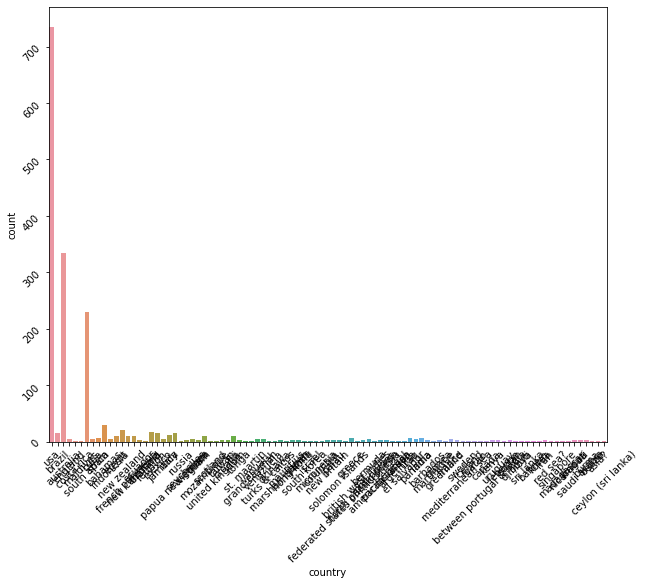

In [96]:
#Creamos un countplot para ver el numero de ataques en cada pais.
sns.countplot(x='country',data=df)
plt.tick_params(labelrotation=45) 
plt.show();

In [97]:
#Como observamos que no se puede ver claramente a que pais corresponde cada barra, y hay varios paises
#  en los que no podemos ver claro sus datos, nos quedamos con los 10 paises con más ataques.
df_mas_ataques=df['country'].value_counts()
df_mas_ataques.head(10)

usa                 734
australia           335
south africa        230
bahamas              29
new zealand          21
reunion              17
brazil               16
mexico               15
papua new guinea     15
italy                11
Name: country, dtype: int64

In [98]:
#Obtenemos la lista de los 10 paises con mas taques registrados.
df_10=df_mas_ataques.iloc[:10]
df_10.index[0:]

Index(['usa', 'australia', 'south africa', 'bahamas', 'new zealand', 'reunion',
       'brazil', 'mexico', 'papua new guinea', 'italy'],
      dtype='object')

In [99]:
#Filtramos nuestro DataFrame original seleccionando solo aquellas filas que correspondan los 10 paises con más ataques.
df_10_primeros=df[(df['country']=='usa')|(df['country']=='australia')|(df['country']=='south africa')|(df['country']=='bahamas')|(df['country']=='new zealand')|(df['country']=='reunion')|(df['country']=='brazil')|(df['country']=='papua new guinea')|(df['country']=='mexico')|(df['country']=='italy')]
df_10_primeros.head()

,year,country,age,species_,month,dead,gender,specie,edad
0,2018,usa,57,White shark,Jun,N,F,white,57.0
1,2018,brazil,18,Tiger shark,Jun,Y,M,tiger,18.0
2,2018,usa,15,"Bull shark, 6'",May,N,M,bull,15.0
3,2018,australia,32,Grey reef shark,May,N,M,grey,32.0
6,2018,australia,60,3 m shark,Apr,N,M,unspecified,60.0


In [100]:
#Comprobamos que se han seleccionado solo las filas de esos 10 paises.
df_10_primeros['country'].unique()

array(['usa', 'brazil', 'australia', 'south africa', 'bahamas',
       'new zealand', 'reunion', 'mexico', 'italy', 'papua new guinea'],
      dtype=object)

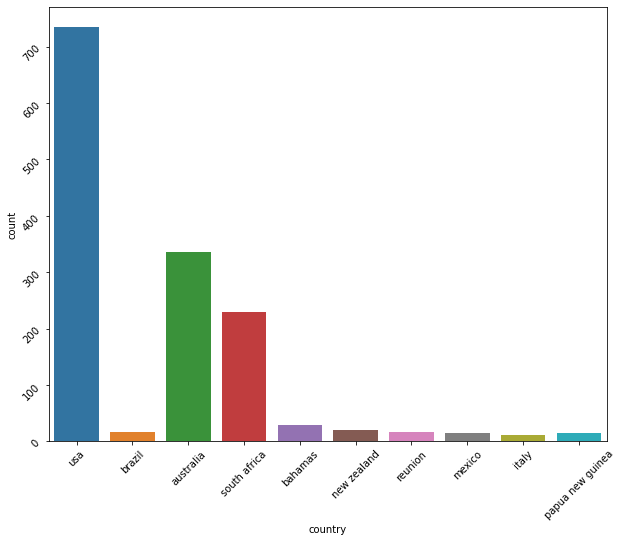

In [101]:
#Creamos un countplot para ver el numero de ataques en esos 10 paises.
sns.countplot(x='country',data=df_10_primeros)
plt.tick_params(labelrotation=45)

plt.show();

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

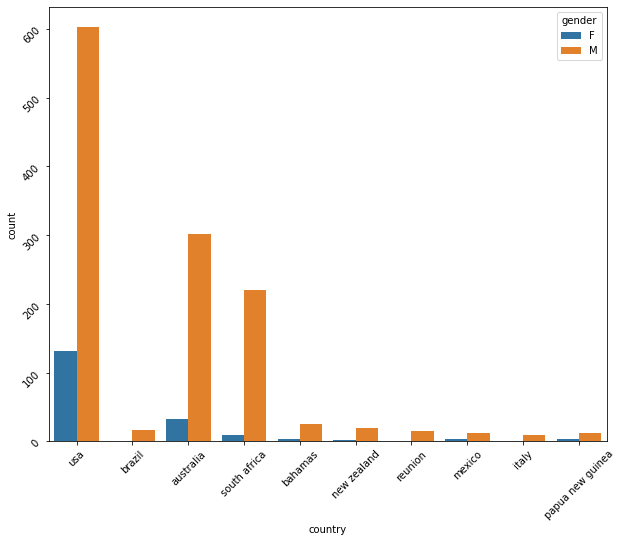

In [102]:
#Creamos de nuevo el mismo countplot para ver el numero de ataques en esos 10 paises, pero añadimos el
#  parametro hue para ver la diferencia por sexos.
sns.countplot(x='country',data=df_10_primeros,hue='gender')
plt.tick_params(labelrotation=45)

plt.show();

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [103]:
df['rangos_edad']=pd.cut(df['edad'],bins=5)
df.head()

,year,country,age,species_,month,dead,gender,specie,edad,rangos_edad
0,2018,usa,57,White shark,Jun,N,F,white,57.0,"(51.8, 67.9]"
1,2018,brazil,18,Tiger shark,Jun,Y,M,tiger,18.0,"(3.42, 19.6]"
2,2018,usa,15,"Bull shark, 6'",May,N,M,bull,15.0,"(3.42, 19.6]"
3,2018,australia,32,Grey reef shark,May,N,M,grey,32.0,"(19.6, 35.7]"
4,2018,england,21,Invalid incident,May,N,M,unspecified,21.0,"(19.6, 35.7]"


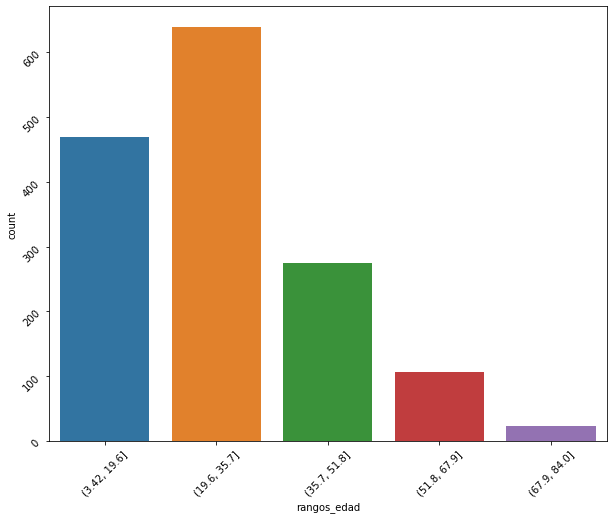

In [104]:
#Creamos un countplot con los rango e edad que hemos generado en la columna 'rangos_edad'.
sns.countplot(x='rangos_edad',data=df)
plt.tick_params(labelrotation=45)

plt.show();

- Ataques entre sexos, ¿hay diferencia?

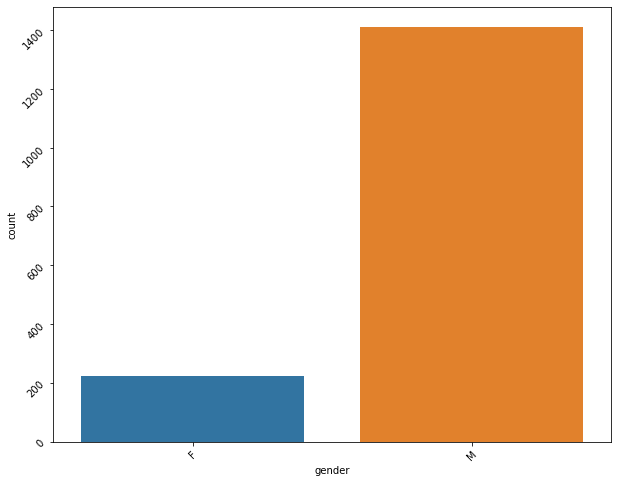

In [105]:
sns.countplot(x='gender',data=df)
plt.tick_params(labelrotation=45)

plt.show();

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

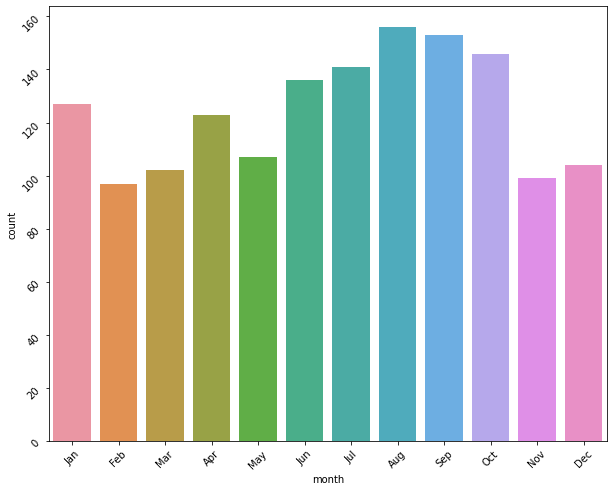

In [116]:
sns.countplot(x='month',data=df,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tick_params(labelrotation=45)

plt.show();

`Vemos que ocurren más ataques en los meses de verano (segun hemisferio norte), pero tambien hay un aumento de casos en los meses que corresponden al verano en el hemisferio sur, es decir, el invierno en el hemisferio norte.`

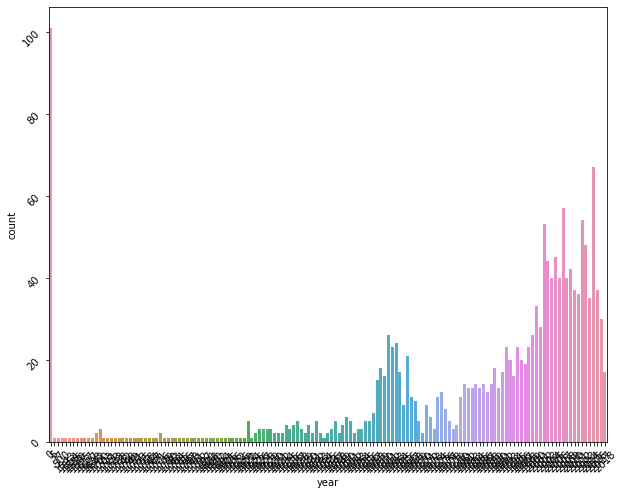

In [108]:
sns.countplot(x='year',data=df)
plt.tick_params(labelrotation=45)

plt.show();

In [121]:
df['año_bins']=pd.cut(df['year'],20)
df.head()

,year,country,age,species_,month,dead,gender,specie,edad,rangos_edad,año_bins
0,2018,usa,57,White shark,Jun,N,F,white,57.0,"(51.8, 67.9]","(1917.1, 2018.0]"
1,2018,brazil,18,Tiger shark,Jun,Y,M,tiger,18.0,"(3.42, 19.6]","(1917.1, 2018.0]"
2,2018,usa,15,"Bull shark, 6'",May,N,M,bull,15.0,"(3.42, 19.6]","(1917.1, 2018.0]"
3,2018,australia,32,Grey reef shark,May,N,M,grey,32.0,"(19.6, 35.7]","(1917.1, 2018.0]"
4,2018,england,21,Invalid incident,May,N,M,unspecified,21.0,"(19.6, 35.7]","(1917.1, 2018.0]"


In [122]:
categoricas=['dead','gender','specie','rangos_edad']

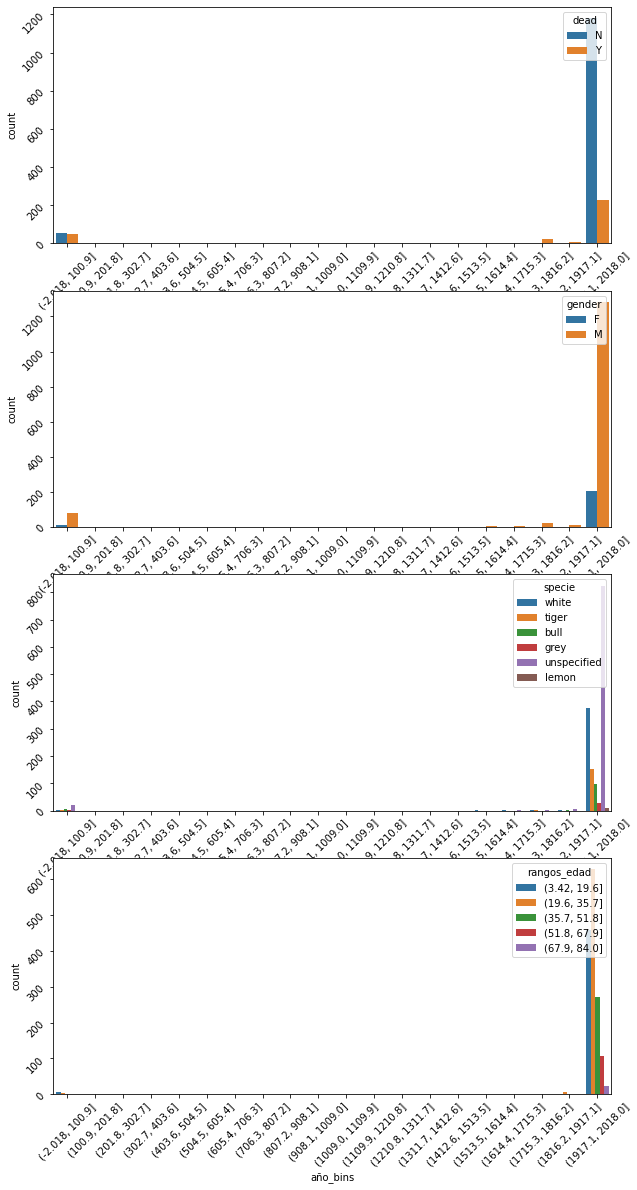

In [126]:
fig, axes = plt.subplots(4,1, figsize=(10,20))
for ax in fig.axes:
    ax.tick_params(labelrotation=45)
for i in range(len(categoricas)):
    sns.countplot(x = 'año_bins', data = df, ax=axes[i], hue = categoricas[i])
plt.show(); 

`Podemos observar que necesitamos quitar outliers para poder apreciar cambios en los ataques segun los años. Ya que los rangos generados en la columna 'años_bins' se centrarian mas en los años donde ocurren la mayoria de ataques (a partir del año 1900).`

Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.

**Happy coding** 🦈